In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

n = 100

def fuzzed(n,percent):
    return n * (1 + 2*percent*0.01 * (np.random.random() - 0.5))

params = {
    'r_mean': 0,
    'r_sd': 1,
    'x_mean': 3,
    'x_sd': 1,
    'slope': 2,
    'intercept': 1
}

# X = number of peeps consumed
# Y = regrets

fuzzy = {key:fuzzed(params[key],5) for key in params}
print(fuzzy)



{'r_mean': 0.0, 'r_sd': 1.0439487685070035, 'x_mean': 2.976419328937298, 'x_sd': 0.9756995915894638, 'slope': 2.0679443416365424, 'intercept': 0.9727402338930846}


                x           y           r
count  100.000000  100.000000  100.000000
mean     3.103798    7.593035    0.201813
std      0.936171    2.146854    0.985397
min      0.965944    2.920852   -1.669454
25%      2.519871    6.373936   -0.595937
50%      3.091186    7.642158    0.184163
75%      3.733399    8.874254    0.903340
max      5.673350   14.434341    2.702479
Index(['x', 'y', 'r'], dtype='object')


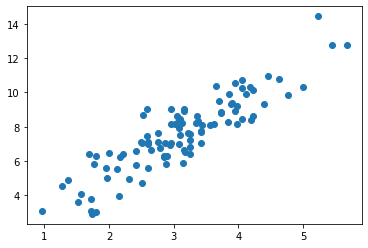

In [10]:
data=[]
for a in range(n):
    residual = np.random.normal(fuzzy['r_mean'],fuzzy['r_sd'])
    x = max(0,np.random.normal(fuzzy['x_mean'],fuzzy['x_sd']))
    y = max(fuzzy['slope'] * x + fuzzy['intercept'] + residual,0)
    data.append({"x":x,"y":y,"r":residual})

#print(data)

df = pd.DataFrame.from_dict(data)
print(df.describe())
print(df.columns)

plt.scatter(df.x, df.y)
plt.show()

In [11]:
model = sm.OLS.from_formula('y ~ x', df).fit()
print(model.params)
sl=model.params[0]
b_0=model.params[1]
plt.plot(df.x,sl*df.y+b_0)
plt.show()

AttributeError: module 'seaborn' has no attribute 'OLS'